In [28]:
# importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader.data import DataReader
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
plt.style.use('fivethirtyeight') 
from pylab import rcParams

In [29]:
# lendo dados da petrobras
start = '2015-01-01'
df = pd.DataFrame(DataReader('PETR4.SA', data_source = 'yahoo',
               start = start)['Adj Close'])

In [30]:
df.head()

,Adj Close
Date,
2015-01-02,6.457029
2015-01-05,5.905146
2015-01-06,5.711986
2015-01-07,5.981030
2015-01-08,6.367347


<AxesSubplot:title={'center':'Valores de PETR4 mensal desde 2018'}, xlabel='Date'>

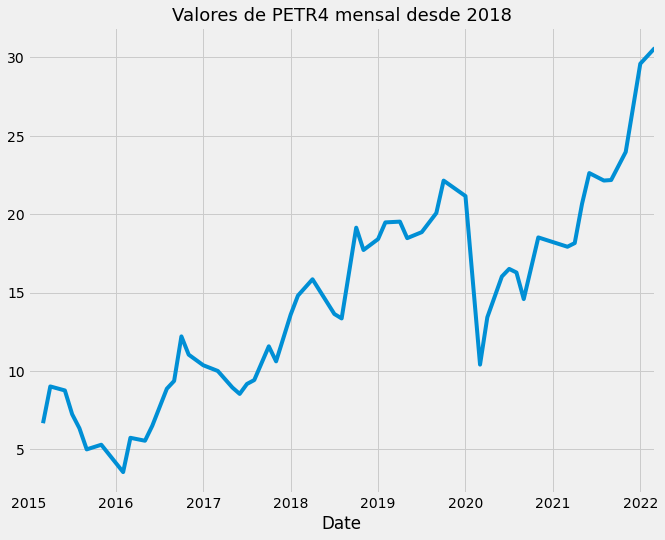

In [31]:
plt.figure(figsize= (10,8))
plt.title("Valores de PETR4 mensal desde 2018", fontsize = 18)
df["Adj Close"].asfreq('M').interpolate().plot()

In [32]:
# calculando a variação de um dia para o outro com o Adj Close
df['Change'] = df['Adj Close'].div(df['Adj Close'].shift())
df.head()

,Adj Close,Change
Date,,
2015-01-02,6.457029,NaN
2015-01-05,5.905146,0.914530
2015-01-06,5.711986,0.967290
2015-01-07,5.981030,1.047102
2015-01-08,6.367347,1.064590


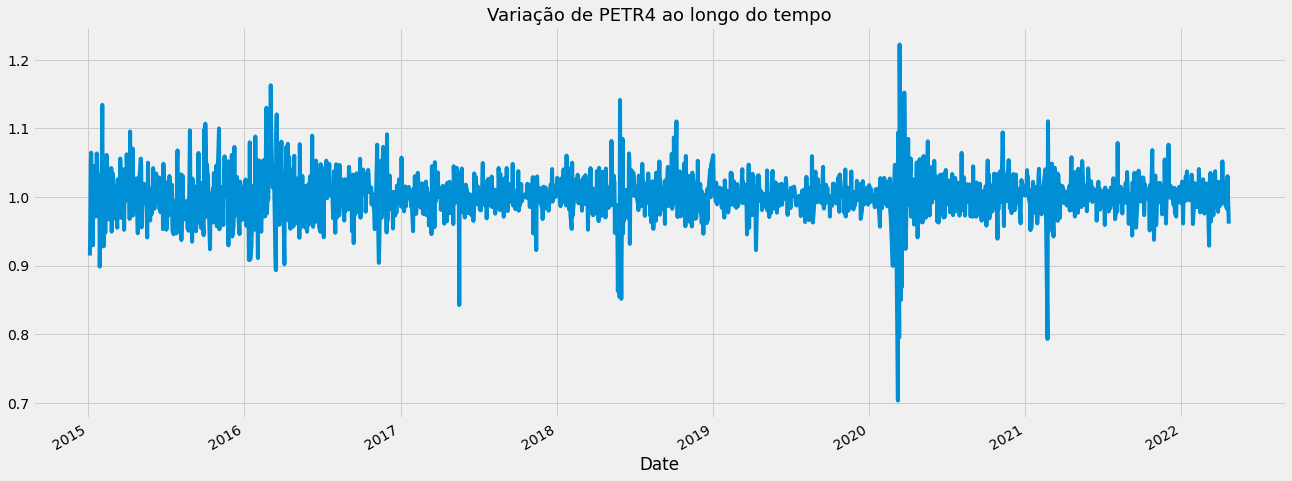

In [33]:
df['Change'].plot(figsize=(20,8))
_ = plt.title('Variação de PETR4 ao longo do tempo', fontsize = 18)

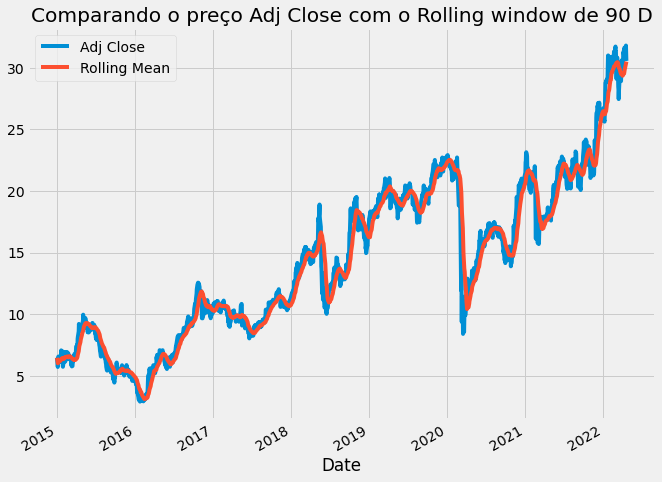

In [34]:
# Rolling window functions
plt.figure(figsize= (10,8))
rolling_df = df['Adj Close'].rolling('30D').mean()
df['Adj Close'].plot()
rolling_df.plot()
_ = plt.title('Comparando o preço Adj Close com o Rolling window de 90 D')
plt.legend(['Adj Close','Rolling Mean'])
# Plotting a rolling mean of 90 day window with original High attribute of Oracle stocks
plt.show()

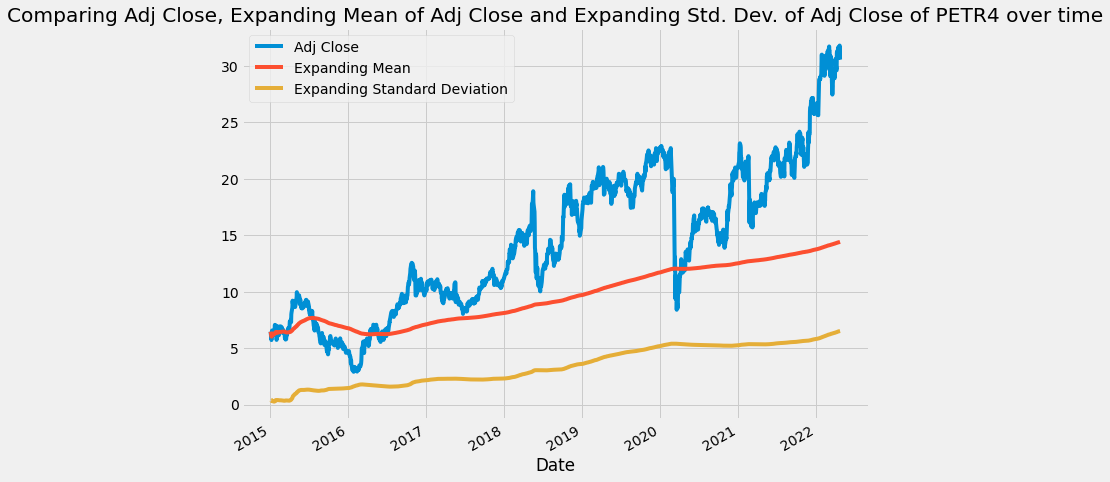

In [35]:
# Expanding window functions
plt.figure(figsize= (10,8))
df_mean = df['Adj Close'].expanding().mean()
df_std = df['Adj Close'].expanding().std()
df['Adj Close'].plot()
df_mean.plot()
df_std.plot()
_ = plt.title('Comparing Adj Close, Expanding Mean of Adj Close and Expanding Std. Dev. of Adj Close of PETR4 over time')
plt.legend(['Adj Close','Expanding Mean','Expanding Standard Deviation'])
plt.show()

Ainda não sei o que isso signiifca mas parece ser bacana essa análise. Vou estudar mais 



## Testar candlesticks graphics

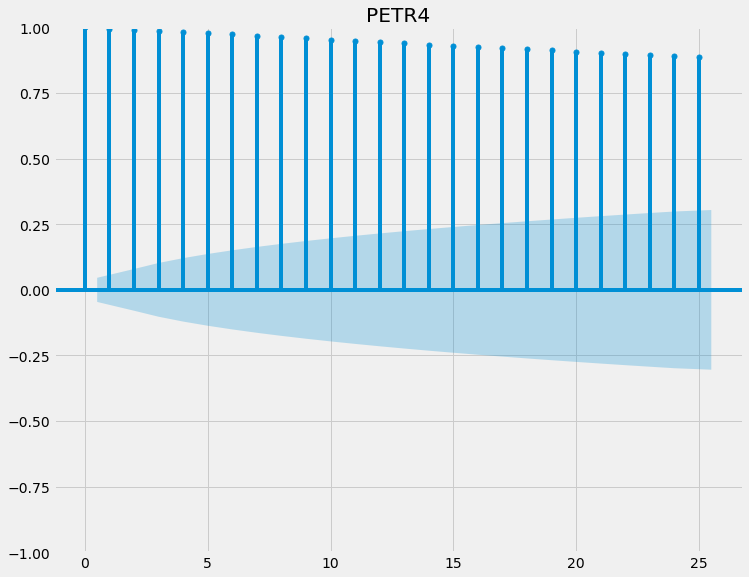

In [36]:
# Testando a autocorrelação
plot_acf(df["Adj Close"],lags=25,title="PETR4")
plt.show()

 Autocorrelation - The autocorrelation function (ACF) measures how a series is correlated with itself at different lags.


 Partial Autocorrelation - The partial autocorrelation function can be interpreted as a regression of the series against its past lags. The terms can be interpreted the same way as a standard linear regression, that is the contribution of a change in that particular lag while holding others constant.

C:\Users\Samuel Natividade\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 720x576 with 0 Axes>

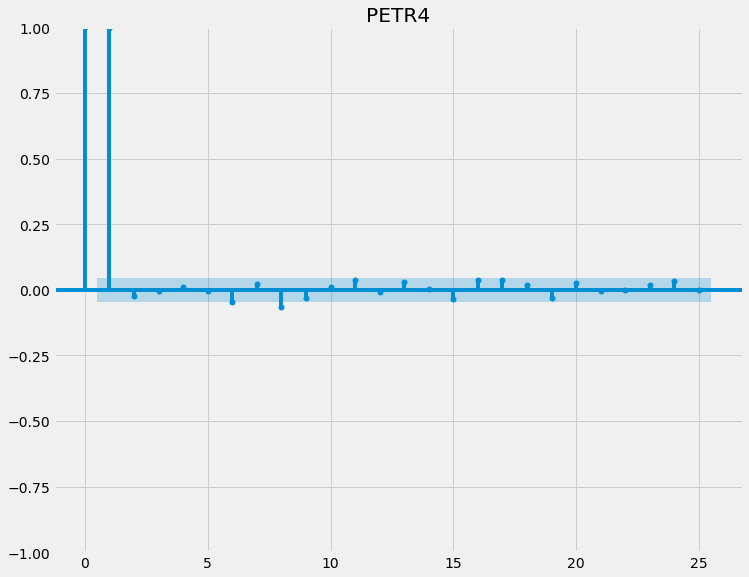

In [37]:
# Testando a autocorrelação
plt.figure(figsize = (10,8))
plot_pacf(df["Adj Close"],lags=25,title="PETR4")
plt.show();

O primeiro lag são estatisticamente significantes

<AxesSubplot:xlabel='Date'>

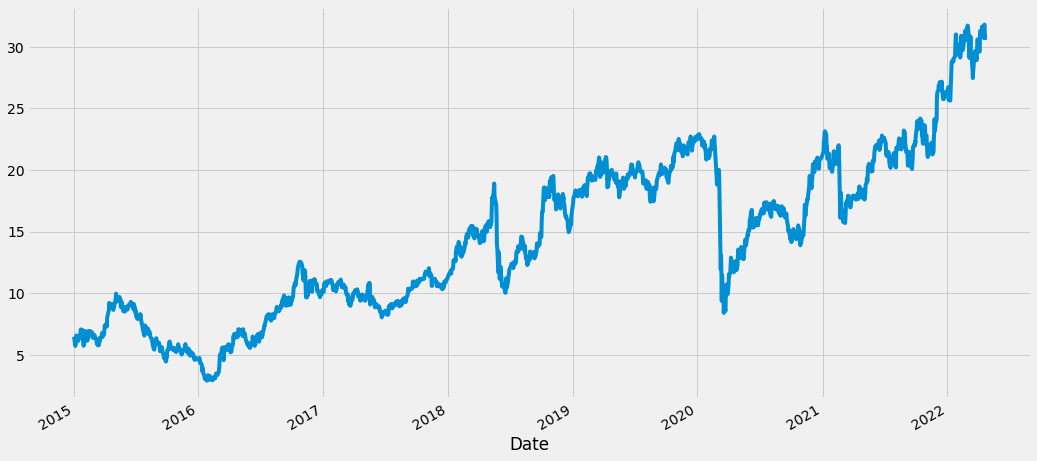

In [38]:
## Time Series decomposition and random walks
df['Adj Close'].plot(figsize = (16,8))

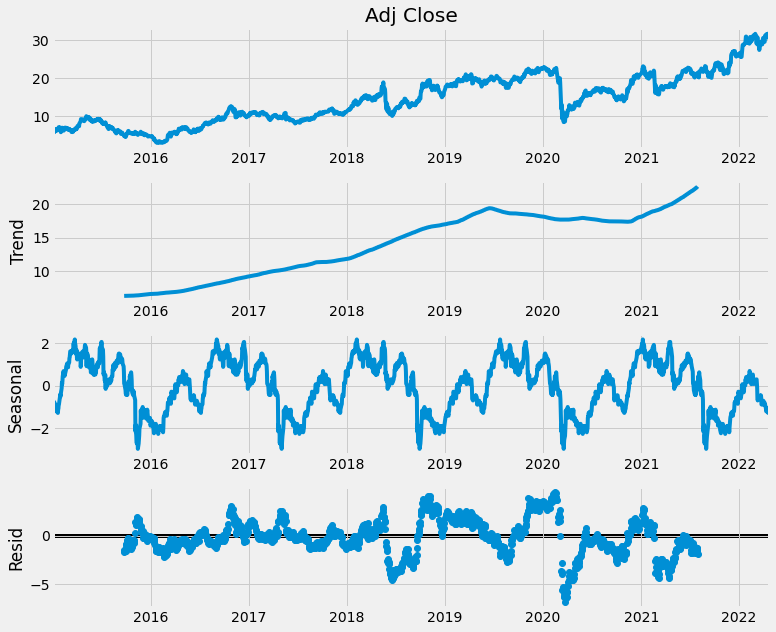

In [39]:
rcParams['figure.figsize'] = 11, 9
decomposed_petr = sm.tsa.seasonal_decompose(df['Adj Close'],period = 360) # The frequncy is annual
figure = decomposed_petr.plot()
plt.show()

Existe uma tendencia aumento no preço na ação desde o início de 2021

Além disso, existe uma tendencia sazonal de altos e baixos muito altas em certos períodos de tempo.

A partir do ano de 2020 os resíduos ficaram bem abaixos, o que pode representar bastante outliers/valores missing

In [41]:
# fazendo o teste de adfuller
#An augmented Dickey–Fuller test (ADF) tests the null hypothesis that a unit root is present in a time series sample. 
# It is basically Dickey-Fuller test with more lagged changes on RHS

adf = adfuller(df["Adj Close"])
print("p-value da Petrobras: {}".format(float(adf[1])))

p-value da Petrobras: 0.8612296534816002


Esse valor de p-valor pode ser considerado uma random walk

In [ ]:
# checando a estacionariedade da série
